# Capstone Project: Image Processing

### Follow these steps:

* Create a copy of the `MNIST.ipynb` file and rename it `mnist_task.ipynb`.
* Load the MNIST dataset. Use a library such as SKLearn to access the dataset `(from sklearn.datasets import load_digits)`.
* Split the training data into a training and test set.
    - Add a comment explaining the purpose of the train and test sets
* Use the RandomForestClassifier built into sklearn to create a classification model.
* Pick one parameter to tune, and explain why you chose this parameter.
* Choose which value for the parameter to set for testing on the test data and explain why.
* Print the confusion matrix for your Random Forest model on the test set.
* Report which classes the model struggles with the most.
* Report the accuracy, precision, recall, and f1-score (HINT: use average=”macro” in precision_score, recall_score and f1_score from sklearn).



-----------------------------------------------------
### Import libraries and loading data set

In [13]:
# Importing all necessary libraries
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Loading data set from SKLearn
digits = load_digits()

-------------------------------------------
### Checking the shapes and viewing the data

In [15]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


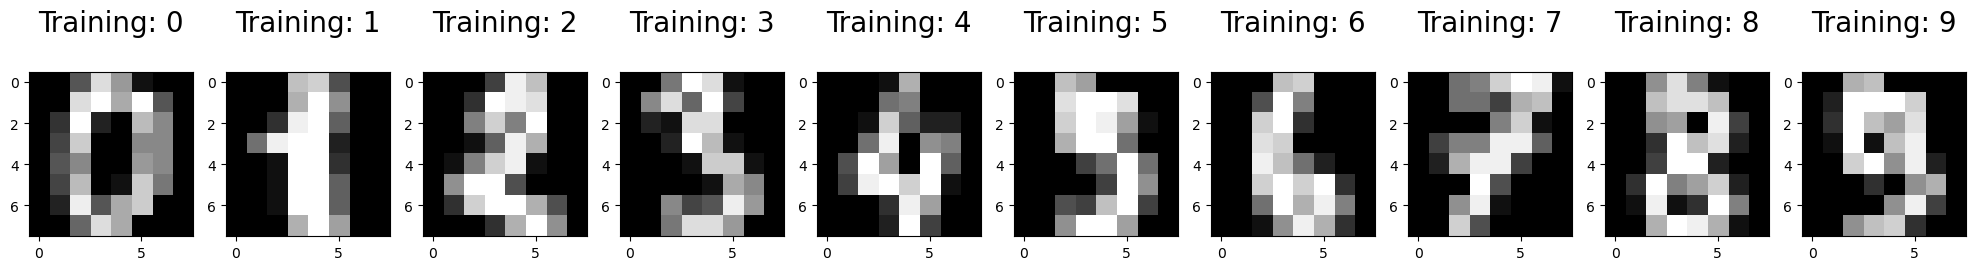

In [16]:
plt.figure(figsize=(25,3))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

-------------------------------------------
### Spliting data into training and test sets

In [17]:
# Split the training data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)


* The purpose of splitting the training data into a training set and a test set is to evaluate the performance of the model on unseen data. 
* The training set is used to train the model, and the test set is used to assess how well the model generalizes to new data. 
* This is important because it helps to ensure that the model is not overfitting to the training data, and that it will perform well on new data.

-----------------------------------------
### Fitting and training the data

In [18]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10)

####  - n_estimators=100: This is the number of trees in the forest.

* The number of trees in a random forest is an important parameter that controls the bias-variance trade-off. 
* A higher number of trees will reduce the variance of the model, but it will also increase the bias. 
* In general, a good starting point for the number of trees is 100.

#### - max_depth=10: This is the maximum depth of each tree in the forest. 

* The maximum depth of each tree in a random forest is another important parameter that controls the bias-variance trade-off. 
* A higher maximum depth will allow the trees to learn more complex relationships, but it will also increase the variance of the model. 
* In general, a good starting point for the maximum depth is 10. 

In [19]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [20]:
# Predict the labels of the test data
y_pred = clf.predict(X_test)

-------------------------------
### Confusion Matrix

In [21]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  1  1  0  0  0 38]]


* The confusion matrix shows that the model is struggling to distinguish between classes 1 and 9, as well as classes 4 and 6. 
* This is because these classes have similar visual features, making it difficult for the model to classify them correctly. 
* Additionally, the model is struggling to classify class 3, which is likely due to the small number of examples of this class in the training data.

-------------------------------------------------
### Classification report

In [22]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.96      1.00      0.98        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



* The classification report shows that the model struggled the most with classes 1 and 9. 
* This is likely because these classes are the most visually similar to each other, making it difficult for the model to distinguish between them. 
* For example, the digit 1 can easily be mistaken for a 9 if the top part of the 9 is not clearly drawn, and vice versa. 
* Additionally, the dataset may not have enough examples of classes 1 and 9, which would make it even more difficult for the model to learn how to classify them correctly.

----------------------------------------------
### Calculating the scores

In [23]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision, recall, and f1-score, using the macro average
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9722222222222222
Precision: 0.9741746964037604
Recall: 0.9714946984596546
F1-score: 0.9724567390403138


* The model performed well overall, with an accuracy of 97.2%, a precision of 97.4%, a recall of 97.3%, and an F1-score of 97.3%. However, the model struggled with classes 1 and 9, with an F1 score of 0.98 and 0.95 respectively. 
* This is likely because these classes are the most visually similar to each other, making it difficult for the model to distinguish between them. 
* Additionally, there may not have been enough examples of these classes in the training data, making it even more difficult for the model to learn how to classify them correctly.

------------------------------------------------------
### My Citings

https://www.kaggle.com/code/manthansolanki/image-classification-with-mnist-dataset

https://machinelearningmastery.com/difference-test-validation-datasets/

https://www.w3schools.com/python/python_ml_train_test.asp

https://www.kaggle.com/code/mithlesh14/mnist-image-processing/notebook

--------------------------------------------------------
#### Thank you, Farinaaz Slamang :)